In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data: https://www.ausgrid.com.au/Industry/Our-Research/Data-to-share/Solar-home-electricity-data
raw_data = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/raw/Solar home half-hour data - 1 July 2012 to 30 June 2013/2012-2013 Solar home electricity data v2.csv")
raw_data

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,29/06/2013,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,NaN
268553,300,3.36,2086,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
268554,300,3.36,2086,CL,30/06/2013,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,NaN
268555,300,3.36,2086,GC,30/06/2013,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,NaN


In [3]:
customer_1 = raw_data[raw_data.Customer == 1]
customer_1

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1,3.78,2076,GC,29/06/2013,0.597,0.526,0.594,0.124,0.176,...,0.182,0.279,0.191,0.436,0.445,0.086,0.145,0.634,0.100,NaN
1091,1,3.78,2076,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
1092,1,3.78,2076,CL,30/06/2013,1.250,1.238,1.250,1.263,0.163,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.056,NaN
1093,1,3.78,2076,GC,30/06/2013,0.031,0.111,0.031,0.109,0.030,...,0.213,0.243,0.190,0.260,0.274,0.509,0.166,0.861,0.631,NaN


In [4]:
customer_1 = customer_1.drop(columns=["Row Quality"])

In [5]:
customer_1_long = pd.melt(customer_1, id_vars=["Customer", "Generator Capacity",'Postcode','Consumption Category',"date"], var_name="time",value_name="consumption")
customer_1_long

,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption
0,1,3.78,2076,CL,1/07/2012,0:30,1.250
1,1,3.78,2076,GC,1/07/2012,0:30,0.855
2,1,3.78,2076,GG,1/07/2012,0:30,0.000
3,1,3.78,2076,CL,2/07/2012,0:30,1.250
4,1,3.78,2076,GC,2/07/2012,0:30,0.309
...,...,...,...,...,...,...,...
52555,1,3.78,2076,GC,29/06/2013,0:00,0.100
52556,1,3.78,2076,GG,29/06/2013,0:00,0.000
52557,1,3.78,2076,CL,30/06/2013,0:00,1.056
52558,1,3.78,2076,GC,30/06/2013,0:00,0.631


In [6]:
customer_1_long["datetime"] = customer_1_long["date"] + " " + customer_1_long["time"]
customer_1_long["datetime"] = pd.to_datetime(customer_1_long.datetime)
customer_1_long = customer_1_long

In [7]:
customer_1_long['Consumption Category'] = customer_1_long['Consumption Category'].replace({"CL":"controlled_load_consumption", "GC": "general_electricity_consumption", "GG": "solar_generation"})
customer_1_long

,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime
0,1,3.78,2076,controlled_load_consumption,1/07/2012,0:30,1.250,2012-01-07 00:30:00
1,1,3.78,2076,general_electricity_consumption,1/07/2012,0:30,0.855,2012-01-07 00:30:00
2,1,3.78,2076,solar_generation,1/07/2012,0:30,0.000,2012-01-07 00:30:00
3,1,3.78,2076,controlled_load_consumption,2/07/2012,0:30,1.250,2012-02-07 00:30:00
4,1,3.78,2076,general_electricity_consumption,2/07/2012,0:30,0.309,2012-02-07 00:30:00
...,...,...,...,...,...,...,...,...
52555,1,3.78,2076,general_electricity_consumption,29/06/2013,0:00,0.100,2013-06-29 00:00:00
52556,1,3.78,2076,solar_generation,29/06/2013,0:00,0.000,2013-06-29 00:00:00
52557,1,3.78,2076,controlled_load_consumption,30/06/2013,0:00,1.056,2013-06-30 00:00:00
52558,1,3.78,2076,general_electricity_consumption,30/06/2013,0:00,0.631,2013-06-30 00:00:00


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


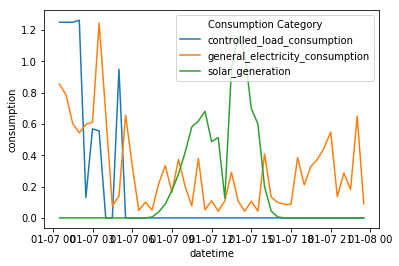

In [8]:
sns.lineplot(data=customer_1_long[(customer_1_long.datetime>"2012-01-07") & (customer_1_long.datetime<"2012-01-08")], x="datetime", y="consumption", hue="Consumption Category")

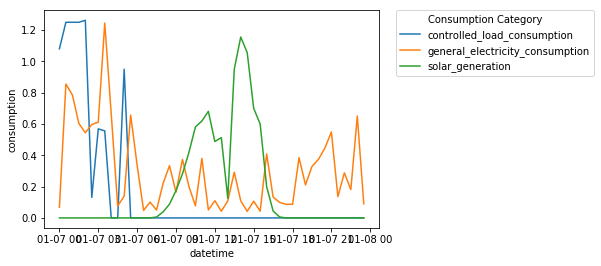

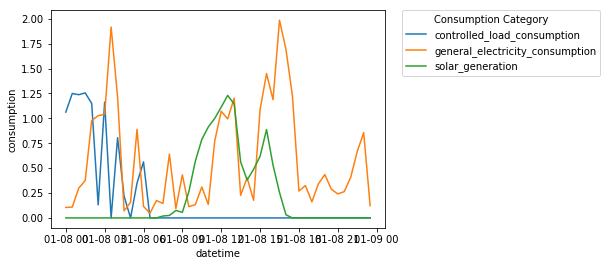

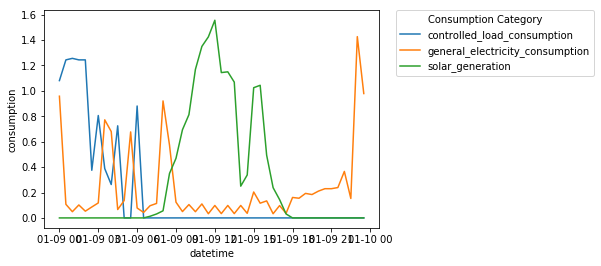

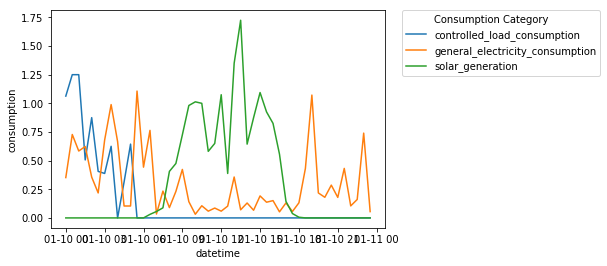

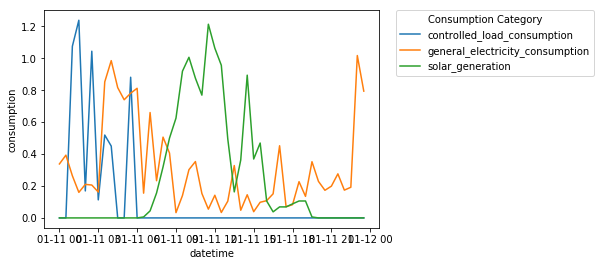

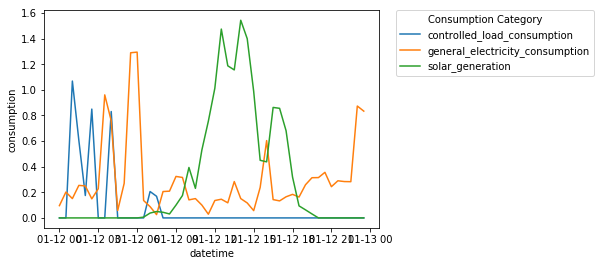

In [18]:
for day, data in customer_1_long[customer_1_long.datetime<"2012-02-01"].groupby("date"):
    sns.lineplot(data=data, x="datetime", y="consumption", hue="Consumption Category")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    plt.close()